# Manifold exploration
Exploring the loss manifold using multiple trajectories from corner points in the diffusion map

In [1]:
import sys
sys.path.append('/Users/zofia/packages/DataDrivenSampler-0.3/lib/python3.6/site-packages')

In [117]:
from DataDrivenSampler.models.model import model
from DataDrivenSampler.exploration.explorer import Explorer
import numpy as np
FLAGS = model.setup_parameters(
    batch_data_files=["dataset-twoclusters.csv"],
    batch_size=500,
    diffusion_map_method="vanilla",
    max_steps=1000,
    number_of_eigenvalues=1,
    optimizer="GradientDescent",
    output_activation="linear",
    sampler="BAOAB",
    seed=426,
    step_width=1e-2,
    use_reweighting=False
)
nn = model(FLAGS)
# init both sample and train right away
nn.init_network(None, setup="sample")
nn.init_network(None, setup="train")
explorer = Explorer(max_legs=10, number_pruning=1)
print("Creating starting trajectory.")
# a. add three legs to queue
explorer.spawn_starting_trajectory(nn)
# b. continue until queue has run dry
explorer.run_all_jobs(nn, FLAGS)
print("Starting multiple explorations from starting trajectory.")
# 2. with the initial trajectory done and analyzed,
#    find maximally separate points and sample from these
max_exploration_steps = 5
exploration_step = 1
while exploration_step < max_exploration_steps:
    # a. combine all trajectories
    parameters, losses = explorer.combine_trajectories()
    # b. perform diffusion map analysis for eigenvectors
    idx_corner = explorer.get_corner_points(parameters, losses, FLAGS, number_of_corner_points=1)
    # d. spawn new trajectories from these points
    explorer.spawn_corner_trajectories(parameters, losses,
                                               idx_corner, nn)
    # d. run all trajectories till terminated
    explorer.run_all_jobs(nn, FLAGS)
    exploration_step += 1

nn.finish()
run_info, trajectory = explorer.get_run_info_and_trajectory()


Parsing ['dataset-twoclusters.csv']
(TensorShape([Dimension(None), Dimension(2)]), TensorShape([Dimension(None), Dimension(1)]))
(tf.float32, tf.int32)
Picking as input columns: ['x1', 'x2']
x is (?, 2)
Creating nn layer output with 2, 1
Setting up output files for sample
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_1:0", shape=(1,), dtype=float64)
Setting up output files for train
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder_2:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_3:0", shape=(1,), dtype=float64)
Creating starting trajectory.
Current job #1: run
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 

Keeping 857 of 3000 indices in total.
Continue? False
Not adding.
Current job #10: extract_minimium_candidates
Found minima candidates: []
Continue? False
Not adding.
Current job #11: analyze
Computing diffusion map
eigenvalues is [ 0.99466662]
Has eigendecompostion converged? False
Continue? False
No minimum candidates on this trajectory.
Starting multiple explorations from starting trajectory.
Global diffusion map eigenvalues: [ 0.96037118]
Current corner point is ['-1.67616318e-01' '-4.14723785e-01' '9.22781329e-03']
Current job #12: run
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder_14:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_15:0", shape=(1,), dtype=float64)
Setting initial parameters to (first ten shown) ['-1.67616318e-01' '-4.14723785e-01' '9.22781329e-03']
Starting to sample
SAMPLED.
Step: 6000.0
Losses (first 

eigenvalues is [ 0.97451932]
Has eigendecompostion converged? True
Continue? False
Added prune job and post analysis
Current job #25: prune
Keeping 334 of 2001 indices in total.
Continue? False
Not adding.
Current job #26: extract_minimium_candidates
Found minima candidates: []
Continue? False
Not adding.
Current job #27: analyze
Computing diffusion map
eigenvalues is [ 1.]
Has eigendecompostion converged? False
Continue? False
No minimum candidates on this trajectory.
Global diffusion map eigenvalues: [ 0.97290101]
Current corner point is ['-2.81744898e-01' '-8.01816727e-01' '1.52873991e-01']
Current job #28: run
Weight: <tf.Variable 'output/weights/Variable:0' shape=(2, 1) dtype=float64_ref>
Placeholder: Tensor("Placeholder_24:0", shape=(2, 1), dtype=float64)
Weight: <tf.Variable 'output/biases/Variable:0' shape=(1,) dtype=float64_ref>
Placeholder: Tensor("Placeholder_25:0", shape=(1,), dtype=float64)
Setting initial parameters to (first ten shown) ['-2.81744898e-01' '-8.01816727e-01

Starting to sample
SAMPLED.
Step: 16000.0
Losses (first and last five): [3.98475385, 3.26839447, 2.61430931, 2.02695584, 1.51033652]
 ... 
[0.836313248, 0.513305902, 0.271179736, 0.111582145, 0.0355985574]
Gradients (first and last five): [0.11574956, 0.104671416, 0.0934152353, 0.0820003083, 0.0704462687]
 ... 
[0.0524235356, 0.0406030981, 0.0287147561, 0.0167814254, 0.00485246329]
Parameters (first and last five): [['9.28652958e-01' '5.23334426e-01' '1.25458406e-01']
 ['8.85904410e-01' '4.74246581e-01' '1.26651917e-01']
 ['8.42430959e-01' '4.24403775e-01' '1.27832782e-01']
 ['7.98309691e-01' '3.73888048e-01' '1.29001341e-01']
 ['7.53618783e-01' '3.22782599e-01' '1.30157946e-01']]
 ... 
[['-2.28881409e-01' '2.57992178e-01' '-1.01181183e-01']
 ['-1.78762994e-01' '3.06123624e-01' '-1.00264658e-01']
 ['-1.28361071e-01' '3.54545731e-01' '-9.93487931e-02']
 ['-7.77571864e-02' '4.03171956e-01' '-9.84340190e-02']
 ['-2.70332232e-02' '4.51915401e-01' '-9.75207673e-02']]
Continue? True
Added an

In [118]:
print("Sampling "+repr(len(trajectory))+" points finished")
print("Exploration results")
print(np.asarray(run_info[0:10]))
print(np.asarray(trajectory[0:10]))

Sampling 4657 points finished
Exploration results
[[1.0 0.0 '0.000' '4.80055332e+00' '6.24870000e-02' '4.80258170e+00'
  '2.02837634e-03' '6.36926423e-02' '1.27385285e-01' '2.61711285e+00'
  '0.00000000e+00' '2.02837634e-03' '2.61711285e+00']
 [2.0 1.0 '0.000' '4.78434038e+00' '1.03810000e-02' '4.80257505e+00'
  '1.82346640e-02' '1.90969443e-01' '1.27168316e-01' '2.60457189e+00'
  '0.00000000e+00' '1.01315202e-02' '2.61084237e+00']
 [3.0 2.0 '0.000' '4.75202465e+00' '9.61700000e-03' '4.80256152e+00'
  '5.05368732e-02' '3.17920975e-01' '1.26734749e-01' '2.57959412e+00'
  '0.00000000e+00' '2.35999712e-02' '2.60042629e+00']
 [4.0 3.0 '0.000' '4.70382547e+00' '9.87600000e-03' '4.80254050e+00'
  '9.87150233e-02' '4.44331010e-01' '1.26085322e-01' '2.54238712e+00'
  '0.00000000e+00' '4.23787342e-02' '2.58591650e+00']
 [5.0 4.0 '0.000' '4.64007282e+00' '7.25100000e-03' '4.80251384e+00'
  '1.62441018e-01' '5.69984242e-01' '1.25221144e-01' '2.49326047e+00'
  '0.00000000e+00' '6.63911910e-02' '2.

In [94]:
import pandas as pd 
df = pd.DataFrame(trajectory)
df.to_csv("run_exploration.csv")


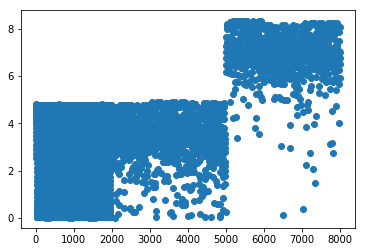

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_run = pd.read_csv("run_exploration.csv", sep=',', header=0)
#display(df_run)
run=np.asarray(df_run.loc[:,['step','loss','weight0', 'weight1', 'bias0']])
loss=np.squeeze(np.asarray(df_run.loc[:,['loss']]))
step=np.squeeze(np.asarray(df_run.loc[:,['step']]))
weights=np.asarray(df_run.loc[:,['weight0', 'weight1', 'bias0']])
plt.scatter(run[:,0], run[:,1])

plt.show()


# Loss landscape exploration

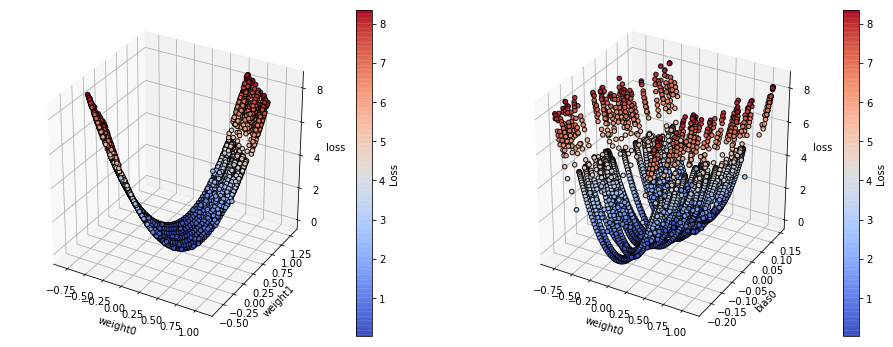

In [114]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(121, projection='3d')
axf = ax.scatter(weights[:,0], weights[:,1], loss, c=loss, alpha=0.90, edgecolors='none', depthshade=True,  cmap=cm.coolwarm)
cbar = fig.colorbar(axf)
cbar.set_label('Loss')
ax.set_xlabel(df_run.axes[1][-3])
ax.set_ylabel(df_run.axes[1][-2])
ax.set_zlabel(df_run.axes[1][2])

ax = fig.add_subplot(122, projection='3d')
axf = ax.scatter(weights[:,0], weights[:,2], loss, c=loss, alpha=0.90, edgecolors='none', depthshade=True,  cmap=cm.coolwarm)
cbar = fig.colorbar(axf)
cbar.set_label('Loss')
ax.set_xlabel(df_run.axes[1][-3])
ax.set_ylabel(df_run.axes[1][-1])
ax.set_zlabel(df_run.axes[1][2])


plt.show()



# Temporal evolution of the landscape exploration

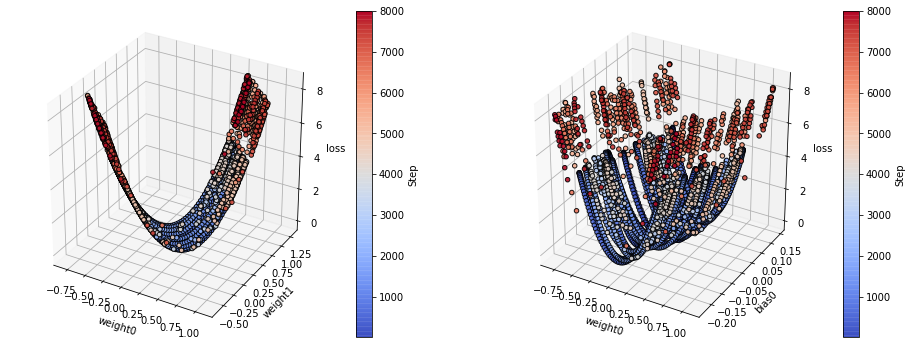

In [116]:
fig = plt.figure()

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(121, projection='3d')
axf = ax.scatter(weights[:,0], weights[:,1], loss, c=step, alpha=0.90, edgecolors='none', depthshade=True,  cmap=cm.coolwarm)
cbar = fig.colorbar(axf)
cbar.set_label('Step')
ax.set_xlabel(df_run.axes[1][-3])
ax.set_ylabel(df_run.axes[1][-2])
ax.set_zlabel(df_run.axes[1][2])

ax = fig.add_subplot(122, projection='3d')
axf = ax.scatter(weights[:,0], weights[:,2], loss, c=step, alpha=0.90, edgecolors='none', depthshade=True,  cmap=cm.coolwarm)
cbar = fig.colorbar(axf)
cbar.set_label('Step')
ax.set_xlabel(df_run.axes[1][-3])
ax.set_ylabel(df_run.axes[1][-1])
ax.set_zlabel(df_run.axes[1][2])


plt.show()
